In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [81]:
df1 = pd.read_csv('train1.csv', engine='python', error_bad_lines=False)
df2 = pd.read_csv('train2.csv', engine='python', error_bad_lines=False)
df = pd.concat([df1, df2])
#Combine train1 and train 2
del df1
del df2 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


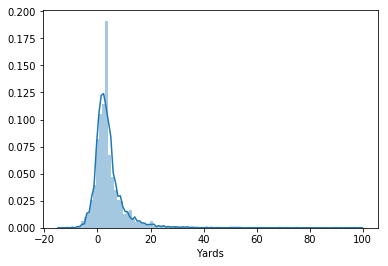

In [82]:
sns.distplot( df['Yards'], bins=100)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


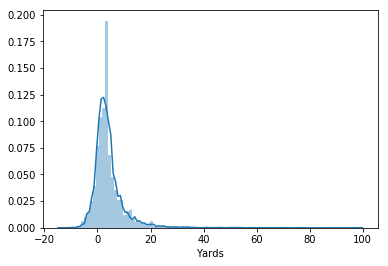

In [83]:
early_downs = df.loc[df['Down'].isin([1, 2])]['Yards']
sns.distplot(home_yards, bins=100)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


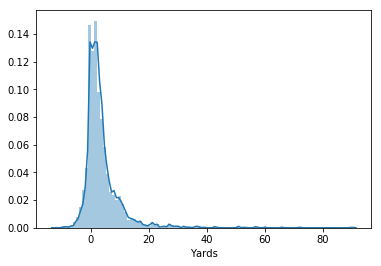

In [84]:
late_downs = df.loc[df['Down'].isin([3, 4])]['Yards']
sns.distplot(away_yards, bins=100)

In [86]:
#Compare two distributions
scipy.stats.ks_2samp(early_downs, late_downs)
#The p value is very low so the distribution is different
#This is probably because on 3rd and 4th down, runs are only called at short distances for the first down

Ks_2sampResult(statistic=0.09296973949893289, pvalue=2.724837766548859e-303)

In [89]:
sum(early_downs)/len(early_downs) - sum(late_downs)/len(late_downs)
#.32 yards more on average when running on 1st and 2nd down

0.32417604764428365

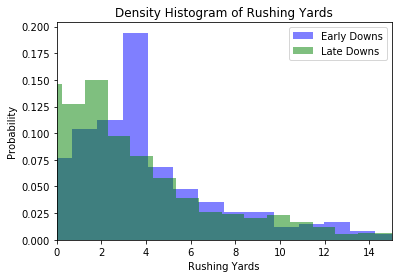

In [99]:
kwargs = dict(alpha=0.5, bins=100, density=True, stacked=True)
plt.hist(early_downs, **kwargs, color='b', label='Early Downs')
plt.hist(late_downs, **kwargs, color='g', label='Late Downs')
plt.gca().set(title='Density Histogram of Rushing Yards', ylabel='Probability', xlabel='Rushing Yards')
plt.xlim(0,15)
plt.legend()